![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

In [16]:
#!pip install scikit-image
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage.data import gravel

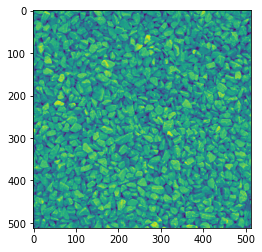

In [17]:
g = gravel()
plt.imshow(g)
plt.show()

In [18]:
g.shape 

(512, 512)

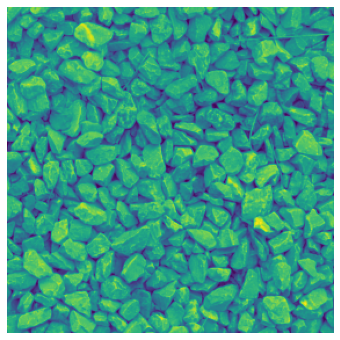

In [19]:
# Crop the image
lx, ly = g.shape

# Cropping (using floor division, dumping decimals after operation)
crop_g = g[lx//5:-lx//4, ly//5:-ly//4]

plt.figure(figsize=(6, 6))
plt.imshow(crop_g)
plt.axis('off')

plt.show()

In [20]:
# Smoothen the image with a kernel filter
import imageio
from scipy import ndimage
from skimage.data import camera

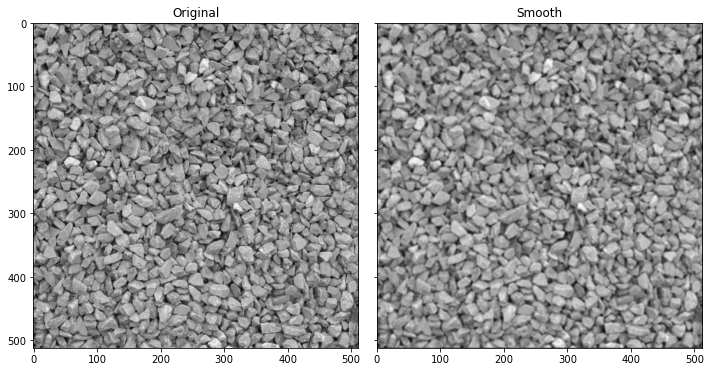

In [21]:
kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 

filtered = ndimage.convolve(g, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Smooth')

plt.tight_layout()
plt.show()

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


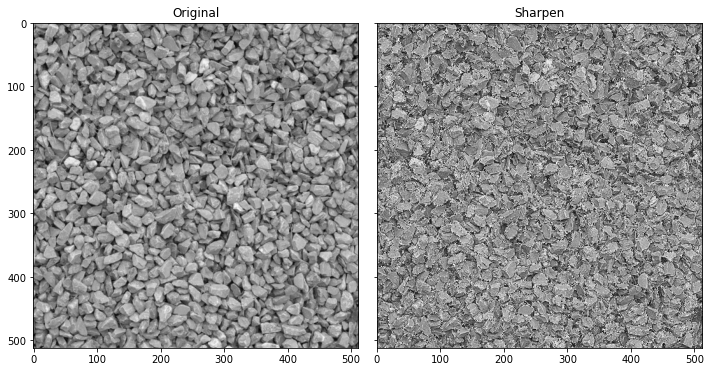

In [22]:
# Sharpen the image with a kernel filter
kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

print(kernel)

filtered = ndimage.convolve(g, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen')

plt.tight_layout()
plt.show()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


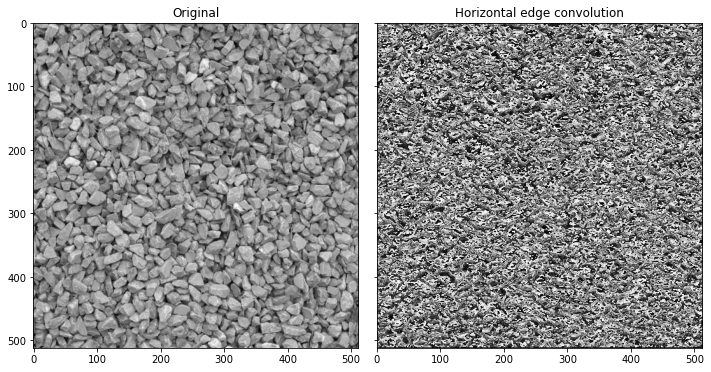

In [23]:
# Find the edges of the image with at least two different methods
kernel = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])

print(kernel)

filtered = ndimage.convolve(g, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show()

[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]


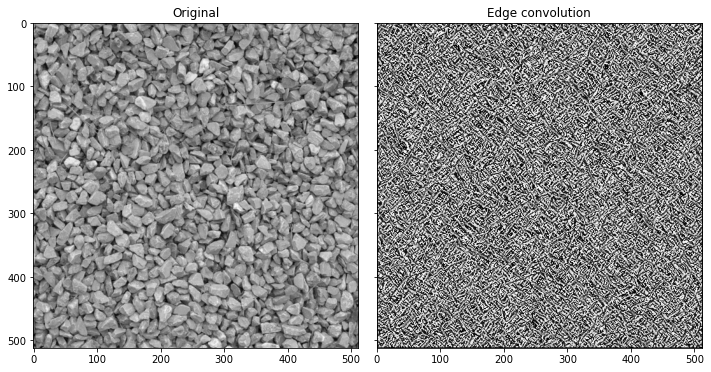

In [24]:
kernel_edge = np.array([ [1, 0, -1], 
                       [0, 0, 0], 
                        [-1, 0, 1]])

print(kernel_edge)

edge = ndimage.convolve(g, kernel_edge, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(g, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge, cmap=plt.cm.gray)
ax[1].set_title('Edge convolution')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

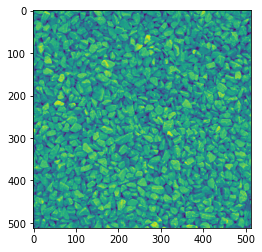

In [25]:
# From the processes above, save the image that you prefer as a .jpg
from skimage.io import imsave

imsave("gravel.jpeg", g)

plt.imshow(g)
plt.show

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

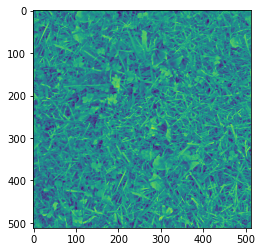

In [26]:
import imageio
from scipy import misc
from skimage.data import grass
gr = grass()
plt.imshow(gr)
plt.show()

In [27]:
gr.shape

(512, 512)

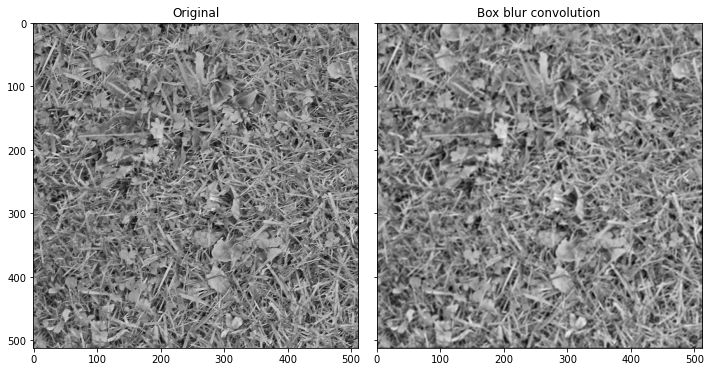

In [28]:
kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 

filtered = ndimage.convolve(gr, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(gr, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

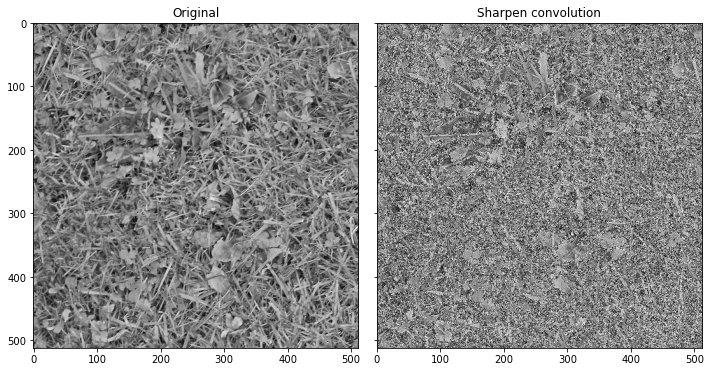

In [29]:
kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

filtered = ndimage.convolve(gr, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(gr, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

In [30]:
from skimage.io import imread, imshow

chess = imread("photo1.jpg", as_gray=True)
imshow(z)

NameError: name 'z' is not defined

In [ ]:
chess.shape

In [ ]:
plt.imshow(chess)
plt.colorbar()
plt.show()

In [ ]:
# Create a zeros array with the same shape as chess
markers = np.zeros_like(chess)

# When the pixels are below 30 (see image above), we can label as background(1)
markers[chess < 0.2] = 1

# When the pixels are above 150 (see image above), we can label as chess(2)
markers[chess > 0.4] = 2
imshow(markers)

In [ ]:
from skimage.filters import sobel

sobel_chess = sobel(chess)
imshow(sobel_chess)

In [ ]:
from skimage.morphology import watershed
segmentation = watershed(sobel_chess, markers)
imshow(segmentation)

In [ ]:
# Remove the background values before filling
from scipy import ndimage as ndi
from skimage.io import imshow

segmentation_treshold = ndi.binary_fill_holes(segmentation-1)
segmentation_opening = ndi.binary_opening(segmentation_treshold, structure=np.ones((5,5)))
segmentation_closing = ndi.binary_closing(segmentation_opening, structure=np.ones((5,5)))
imshow(segmentation_closing)

In [ ]:
labeled_chess, number_chess = ndi.label(segmentation_opening)
print(number_chess)
imshow(labeled_chess)